# Исследование данных о компьютерных играх

Перед нами данные из открытых источников о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах за 2016 год. Наша задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# План работ:



<b>Шаг 1. Откроем файл с данными и изучим общую информацию</b>

- Путь к файлу: /datasets/games.csv.

<b>Шаг 2. Подготовим данные</b>
    
- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
    - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишем причины, которые могли привести к пропускам;
    - Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
    
<b>Шаг 3. Проведем исследовательский анализ данных</b>

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не будем учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<b>Шаг 4. Составим портрет пользователя каждого региона</b>

- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b>Шаг 5. Проверим гипотезы</b>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Зададим самостоятельно пороговое значение alpha.
- Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.
    
<b>Шаг 6. Напишем общий вывод</b>

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из общей информации видим, что в данных есть пропуски, и некоторые колонки нуждаются в замене типов. А именно:
- в колонках name и genre пропуски находятся в одних и тех же строках, их всего две, их можно просто удалить,
- в колонке year_of_release количество пропущенных значений меньше 2%, много данных не потеряем, удалив эти строки,
- пропуски в колонках critic_score, user_score и rating оставим как есть, их заполнить нечем,


- колонка year_of_release содержит год выхода игры, это целое число, заменим тип,
- колонка user_score содержит оценки пользователей, это число с плавающей точкой, заменим тип.

## Подготовим данные

Приведем названия столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две строки с безымянными играми неизвестного жанра, удалим их.

In [8]:
data = data.query('name.notna()')

In [9]:
data.query('year_of_release.isna() and (na_sales > 5 or eu_sales > 5 or jp_sales > 5 or other_sales > 5)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Строк с неизвестным годом и выдающимся количеством продаж в датафрейме нет.

Приведем колонку с годом выпуска year_of_release к целочисленному формату, предварительно удалив пропущенные значения.

In [10]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype(int)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди оценок встречается аббревиатура tbd - to be determind, заменим эти значения на NaN и приведем колонку к формату float.

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [13]:
data['user_score'] = data['user_score'].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
data.query('critic_score.isna() and user_score.isna() and rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в колонках critic_score, user_score и rating пересекаются практически полностью и не зависят от платформы, жанра, года выпуска или объема продаж. Видимо, здесь произошел какой-то технический сбой сбора данных.

Добавим новый столбец с суммарными продажами во всех регионах.

In [16]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [17]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Названия рейтингов К-А и Е это одно и то же, можно их объединить.

In [19]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Чтобы данные попали в дальнейший анализ, заполним пропуски в столбце rating заглушкой.

In [20]:
data['rating'].fillna('no_rating', inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Приведем колонки с именами, платфомами и жанрами к нижнему регистру.

In [22]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

Найдем дубликаты по колонкам name, platform и year_of_release.

In [23]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [24]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

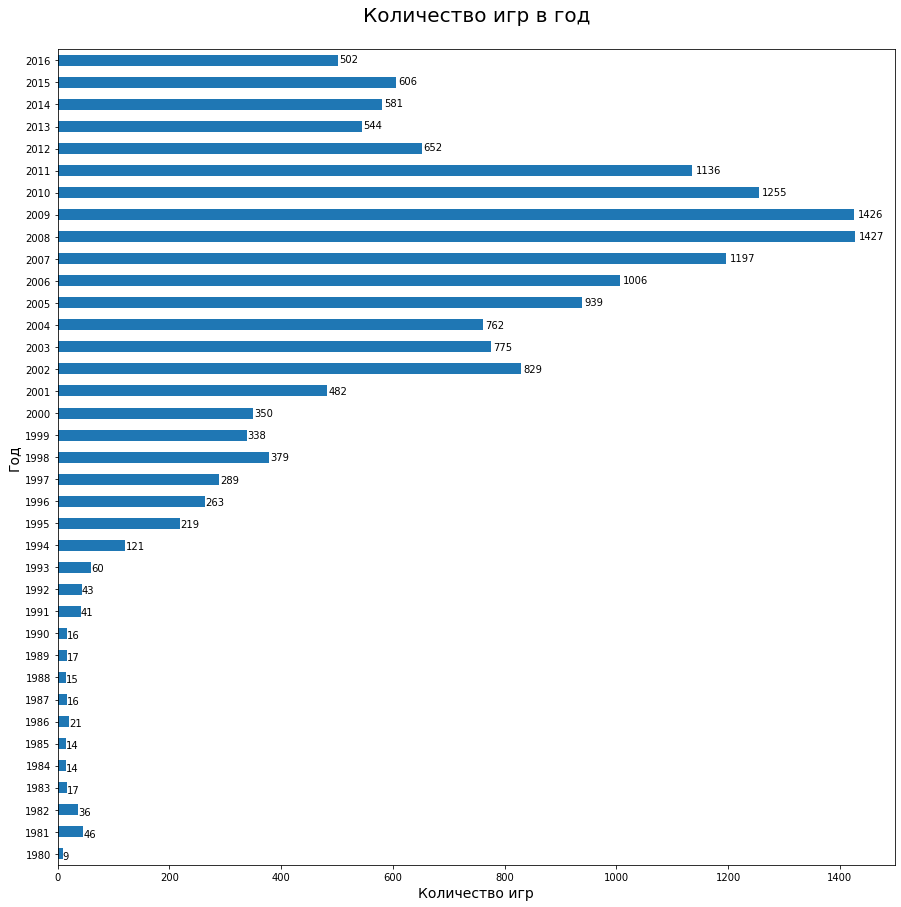

In [25]:
games_count_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
ax = games_count_by_year.plot.barh(figsize=(15,15), legend=False)
ax.set_xlabel('Количество игр', fontsize=14)
ax.set_ylabel('Год', fontsize=14)
ax.set_title('Количество игр в год'+ '\n', fontsize=20)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

До 1993 года включительно количество выпущенных игр очень мало, вряд ли данные за этот период пригодятся для анализа.

In [26]:
data = data.query('year_of_release > 1993')

### Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [27]:
top_sales = data \
    .groupby(by=['year_of_release', 'platform']).sum() \
    .pivot_table(columns='platform', values='total_sales', index='year_of_release') \
    .agg(['idxmax', 'max'], axis=1) \
    .reset_index() \
    .rename(columns={'index':'year_of_release', 'idxmax':'platform', 'max':'max_sales'})
top_sales

,year_of_release,platform,max_sales
0,1994,snes,35.08
1,1995,ps,35.96
2,1996,ps,94.7
3,1997,ps,136.17
4,1998,ps,169.49
5,1999,ps,144.53
6,2000,ps,96.37
7,2001,ps2,166.43
8,2002,ps2,205.38
9,2003,ps2,184.31


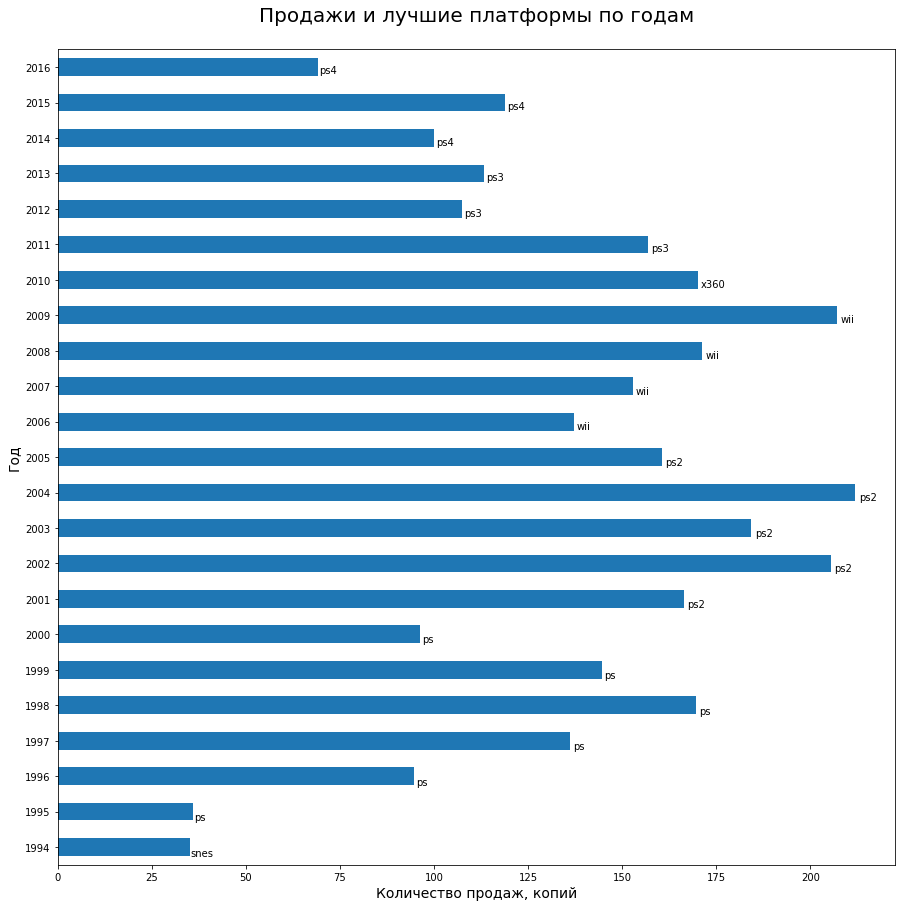

In [28]:
ax = top_sales.plot.barh(x='year_of_release', y='max_sales', figsize=(15, 15), legend=False)
ax.set_xlabel('Количество продаж, копий', fontsize=14)
ax.set_ylabel('Год', fontsize=14)
ax.set_title('Продажи и лучшие платформы по годам'+ '\n', fontsize=20)
for i, p in enumerate(ax.containers[0]):
    ax.annotate(top_sales['platform'][i], (p.get_width() * 1.005, p.get_y()*1.003))

В среднем платформы держатся в топе от 3 до 5 лет.

In [29]:
# check
data.query('year_of_release == 2004').groupby(by=['year_of_release', 'platform']) \
    .sum().reset_index()[['year_of_release', 'platform', 'total_sales']]

,year_of_release,platform,total_sales
0,2004,ds,17.27
1,2004,gba,77.91
2,2004,gc,28.82
3,2004,pc,10.39
4,2004,ps2,211.81
5,2004,psp,7.06
6,2004,xb,65.42


### Какие платформы лидируют по продажам, растут или падают?

Строк с неизвестным годом и выдающимся количеством продаж в датафрейме нет.

In [30]:
platform_pivot_table = data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
platform_pivot_table

platform,3do,3ds,dc,ds,gb,gba,gc,gen,n64,nes,ng,pc,pcfx,ps,ps2,ps3,ps4,psp,psv,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,0.80,12.87,NaN,6.03,NaN,NaN,NaN,NaN,NaN,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,0.33,4.22,NaN,35.96,NaN,NaN,NaN,NaN,NaN,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,0.10,10.58,0.03,94.70,NaN,NaN,NaN,NaN,NaN,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,NaN,11.27,NaN,136.17,NaN,NaN,NaN,NaN,NaN,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,NaN,3.26,NaN,169.49,NaN,NaN,NaN,NaN,NaN,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,NaN,4.74,NaN,144.53,NaN,NaN,NaN,NaN,NaN,0.09,NaN,0.26,NaN,NaN,NaN,0.46,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,NaN,4.66,NaN,96.37,39.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.68,NaN,0.99,NaN
2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,NaN,5.47,NaN,35.59,166.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,NaN,22.26,NaN
2002,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,NaN,NaN,8.57,NaN,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


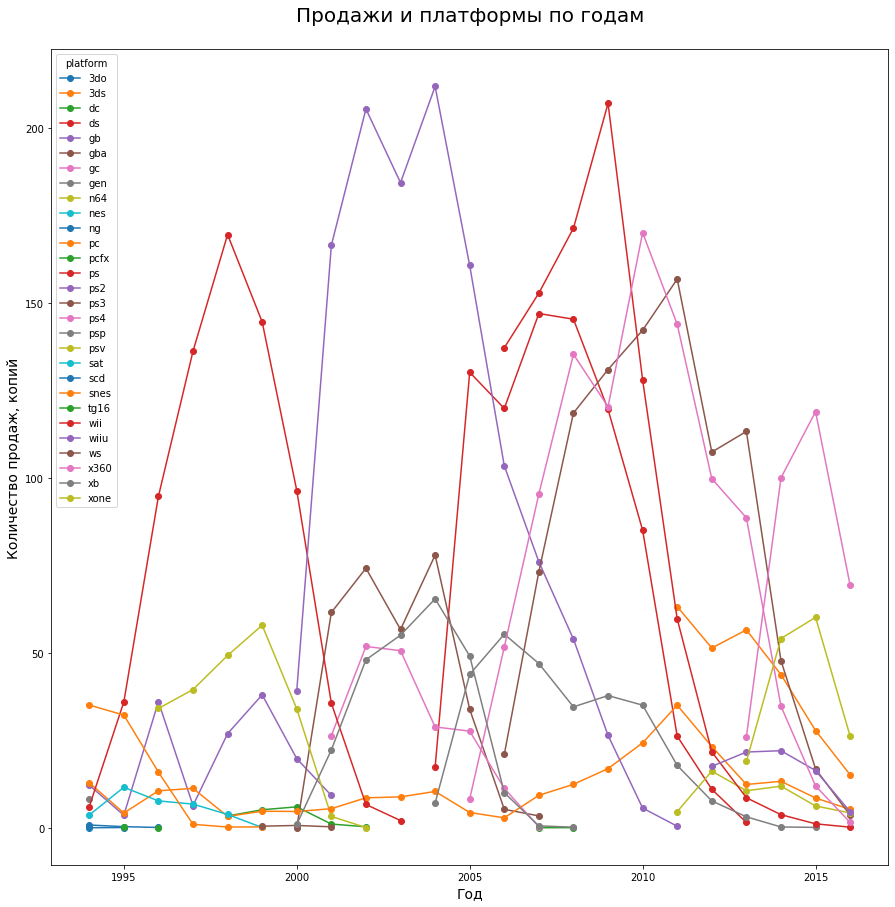

In [31]:
ax = platform_pivot_table.plot(figsize=(15, 15), style='o-')
ax.set_ylabel('Количество продаж, копий', fontsize=14)
ax.set_xlabel('Год', fontsize=14)
ax.set_title('Продажи и платформы по годам'+ '\n', fontsize=20);

Как видно из сводной таблицы и графика, в среднем срок "жизни" крупных платформ составляет 8-12 лет.

Выделим только те платформы, которые актуальны на данный момент.

In [32]:
actual_platforms = platform_pivot_table.query('year_of_release == 2016').notna().T
actual_platforms = list(actual_platforms.loc[actual_platforms[2016] == True].index)
actual_platforms

['3ds', 'pc', 'ps3', 'ps4', 'psv', 'wii', 'wiiu', 'x360', 'xone']

In [33]:
actual_platforms_data = data.query('platform in @actual_platforms')
actual_platforms_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


За актуальный период возьмем последние 3 года, учитывая, что за 2016 год данные неполные. Выберем из актуальных платформ данные за 2014, 2015 и 2016 год.

In [34]:
actual_data = actual_platforms_data.query('year_of_release == [2014, 2015, 2016]')

In [35]:
actual_pivot_table = actual_data.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
)
actual_pivot_table

platform,3ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


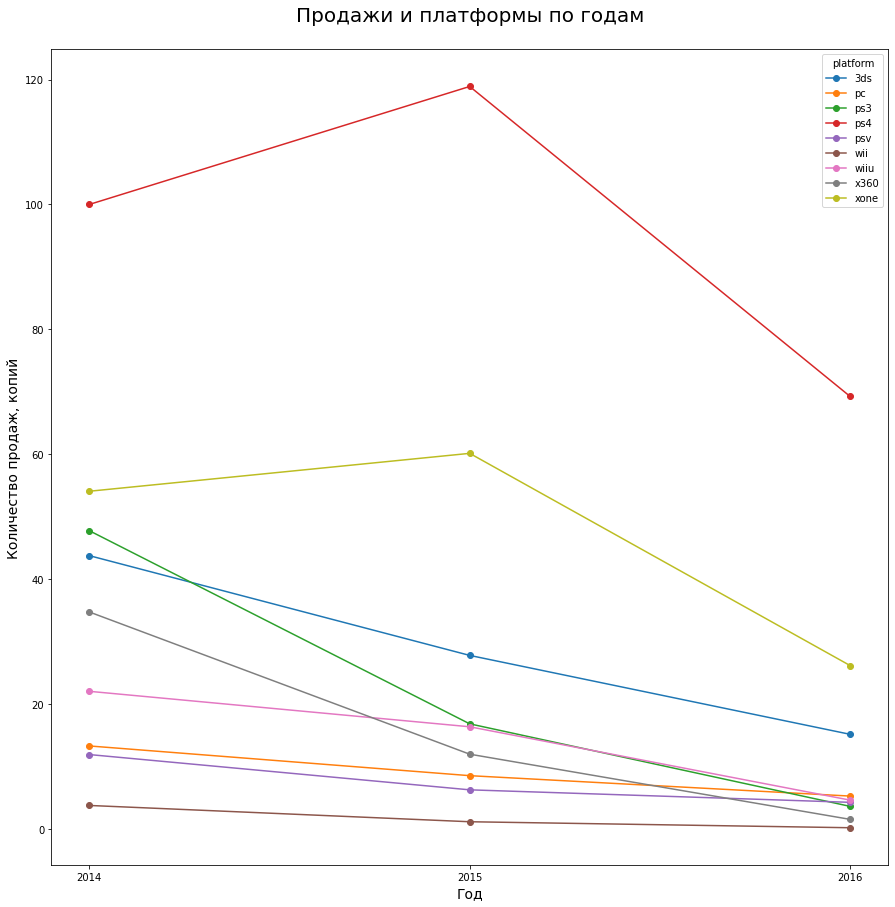

In [36]:
ax = actual_pivot_table.plot(figsize=(15, 15), style='o-')
ax.set_ylabel('Количество продаж, копий', fontsize=14)
ax.set_xlabel('Год', fontsize=14)
ax.set_title('Продажи и платформы по годам'+ '\n', fontsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True));

По продажам лидируют 3 платформы, это - PS4, XOne и 3DS. Рост в продажах видно для платформ PS4 и XOne, а PS3 и X360 заметно упали с 2014 по 2015 год (на 2016 год не смотрим, там данные неполные).

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

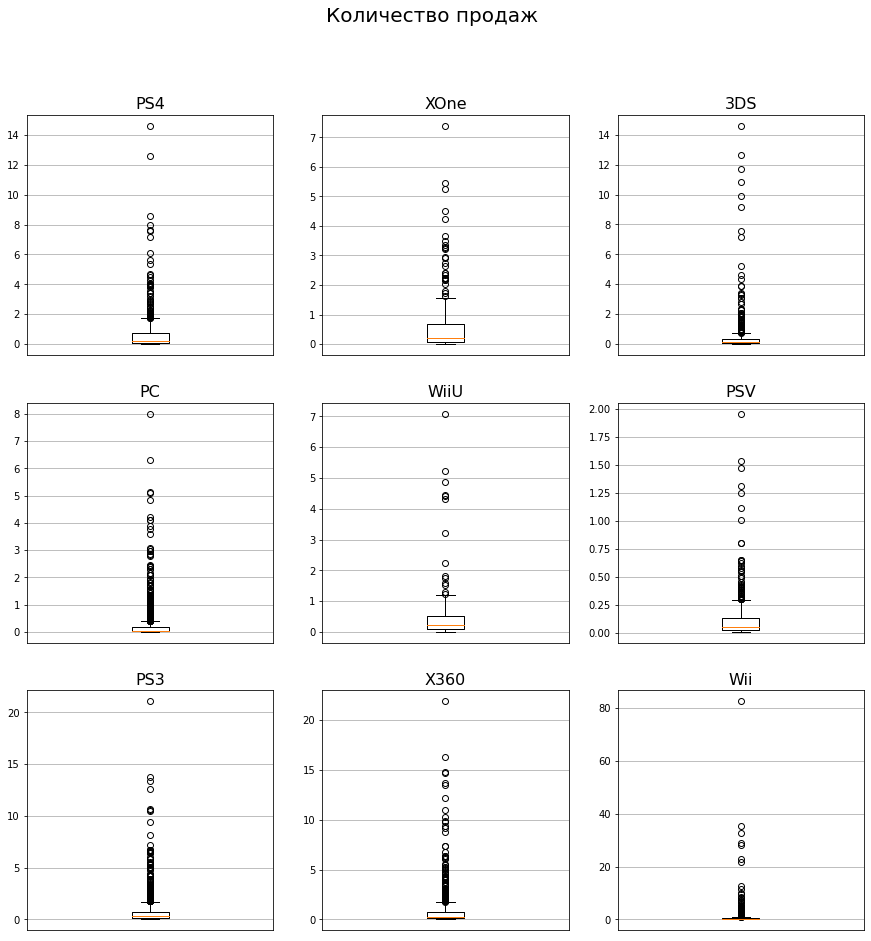

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0, 0].boxplot(data.query('platform == "ps4"')['total_sales'])
axs[0, 1].boxplot(data.query('platform == "xone"')['total_sales'])
axs[0, 2].boxplot(data.query('platform == "3ds"')['total_sales'])
axs[1, 0].boxplot(data.query('platform == "pc"')['total_sales'])
axs[1, 1].boxplot(data.query('platform == "wiiu"')['total_sales'])
axs[1, 2].boxplot(data.query('platform == "psv"')['total_sales'])
axs[2, 0].boxplot(data.query('platform == "ps3"')['total_sales'])
axs[2, 1].boxplot(data.query('platform == "x360"')['total_sales'])
axs[2, 2].boxplot(data.query('platform == "wii"')['total_sales'])

ax_labels = ['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3', 'X360', 'Wii']
for i, ax in enumerate(axs.flat):
    ax.grid(visible=True)
    ax.set_title(ax_labels[i], fontsize=16)
    ax.axes.xaxis.set_visible(False)
fig.suptitle('Количество продаж', fontsize=20);

Посмотрим на ящики с усами поближе, на 75 квантиль и медиану

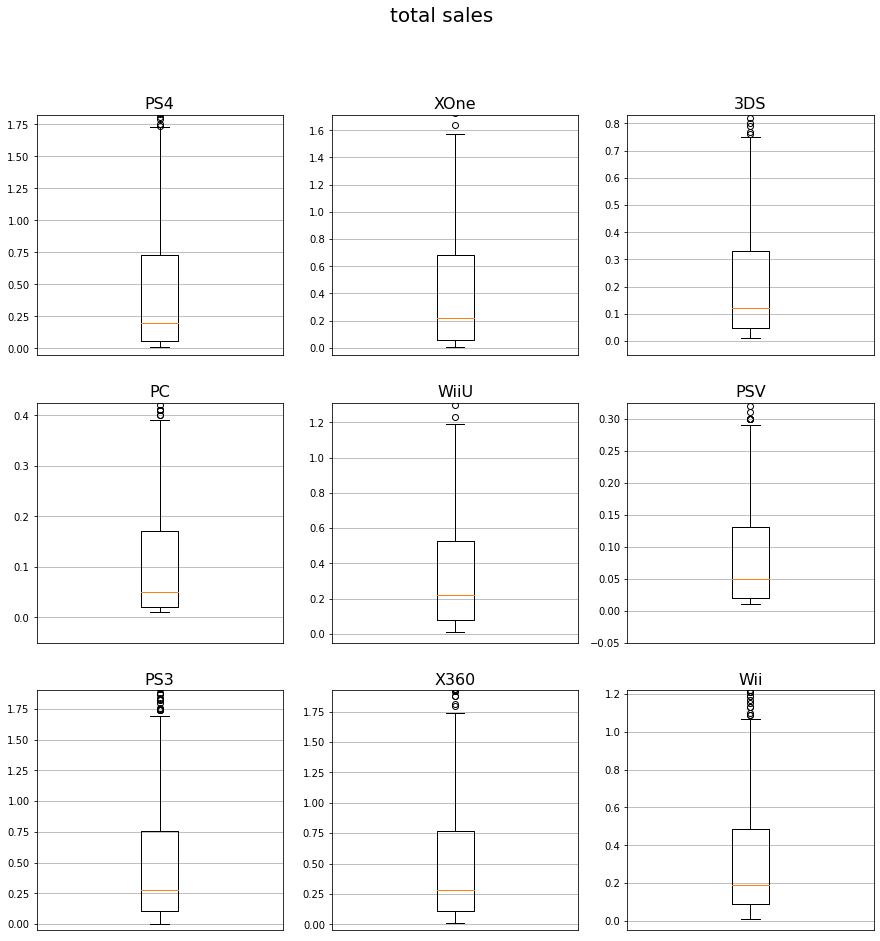

In [38]:
ax_labels = ['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3', 'X360', 'Wii']
ax_platforms = [x.lower() for x in ax_labels]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    platform_sales = data.query('platform == @ax_platforms[@i]')['total_sales']
    q75 = platform_sales.quantile(0.75) * 2.5
    ax.boxplot(platform_sales)
    ax.grid(visible=True)
    ax.set_title(ax_labels[i], fontsize=16)
    ax.axes.xaxis.set_visible(False)
    ax.set_ybound(-0.05, q75)
fig.suptitle('total sales', fontsize=20);

In [39]:
for platform in actual_platforms:
    print(platform)
    display(data.query('platform == @platform')['total_sales'].describe())

3ds


count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64

pc


count    950.000000
mean       0.265958
std        0.679108
min        0.010000
25%        0.020000
50%        0.050000
75%        0.170000
max        8.010000
Name: total_sales, dtype: float64

ps3


count    1305.000000
mean        0.713663
std         1.403467
min         0.000000
25%         0.110000
50%         0.280000
75%         0.760000
max        21.050000
Name: total_sales, dtype: float64

ps4


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

psv


count    429.000000
mean       0.125431
std        0.212341
min        0.010000
25%        0.020000
50%        0.050000
75%        0.130000
max        1.960000
Name: total_sales, dtype: float64

wii


count    1286.000000
mean        0.692986
std         3.165022
min         0.010000
25%         0.090000
50%         0.190000
75%         0.487500
max        82.540000
Name: total_sales, dtype: float64

wiiu


count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64

x360


count    1232.000000
mean        0.780227
std         1.632122
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: total_sales, dtype: float64

xone


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

У платформы 3DS очень маленькая медиана - 0,12, но очень много выбросов, именно за счет выбросов она держится в топе. Также много выбросов на платформе Wii, одна игра вообще взлетела до необычайных высот - 82,5 тысячи продаж

Самые высокие медианы у плаформ PS3 и X360 - 0,28, можно сказать, это самые стабильные платформы.


### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Самая популярная платформа - PS4. Проверим, как влияют на продажи отзывы к играм для этой платформы.

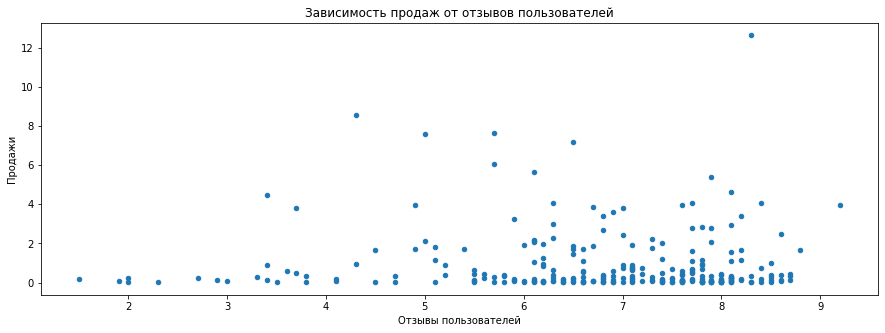

In [40]:
data.query('platform == "ps4"').plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы пользователей',
    ylabel='Продажи',
    title='Зависимость продаж от отзывов пользователей',
    figsize=(15, 5)
);

In [41]:
data.query('platform == "ps4"')['user_score'].corr(data.query('platform == "ps4"')['total_sales'])

-0.031957110204556376

Судя по коэффициету Пирсона и диаграмме рассеяния, нет практически никакой связи между отзывами пользователей и продажами.

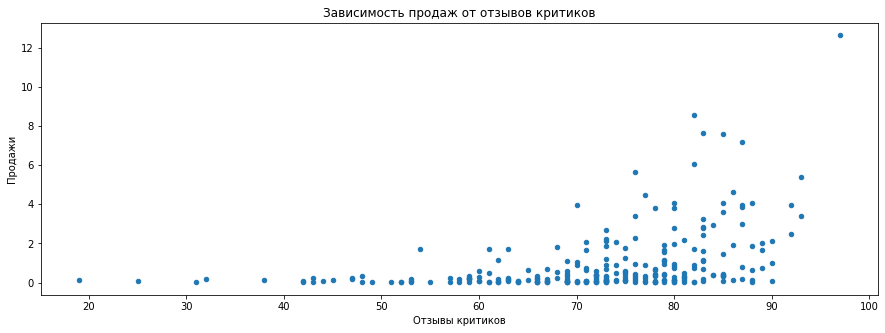

In [42]:
data.query('platform == "ps4"').plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы критиков',
    ylabel='Продажи',
    title='Зависимость продаж от отзывов критиков',
    figsize=(15, 5)
);

In [43]:
data.query('platform == "ps4"')['critic_score'].corr(data.query('platform == "ps4"')['total_sales'])

0.40656790206178095

Для связи между отзывами критиков и продажами коэффициент Пирсона выше, но все еще недостаточный для того, чтобы можно было говорить о явной закономерности.

### Соотнесем выводы с продажами игр на других платформах.

Проведем аналогичный разбор для платформ 3DS, WiiU и XOne.

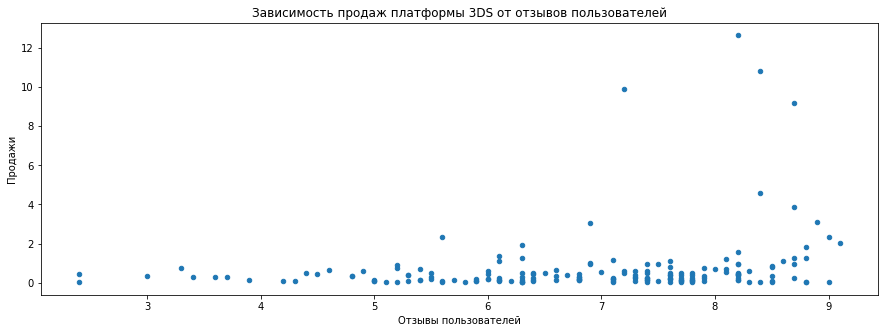

In [44]:
data.query('platform == "3ds"').plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы пользователей',
    ylabel='Продажи',
    title='Зависимость продаж платформы 3DS от отзывов пользователей',
    figsize=(15, 5)
);

In [45]:
print('Коэффициент Пирсона равен',
      data.query('platform == "3ds"')['user_score'].corr(data.query('platform == "3ds"')['total_sales']))

Коэффициент Пирсона равен 0.22207843643390882


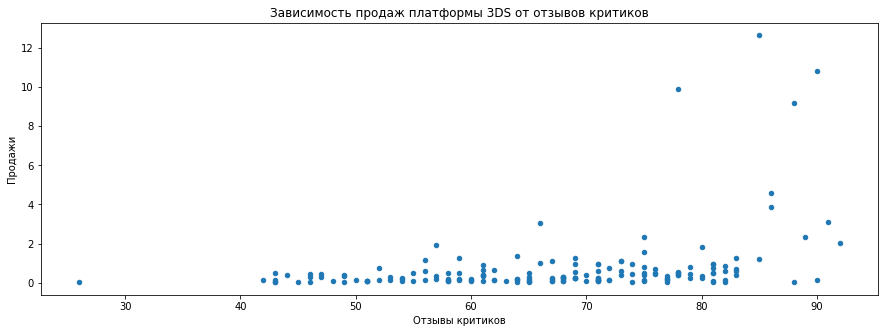

In [46]:
data.query('platform == "3ds"').plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы критиков',
    ylabel='Продажи',
    title='Зависимость продаж платформы 3DS от отзывов критиков',
    figsize=(15, 5));

In [47]:
print('Коэффициент Пирсона равен',
data.query('platform == "3ds"')['critic_score'].corr(data.query('platform == "3ds"')['total_sales']))

Коэффициент Пирсона равен 0.3487397305984834


Для платформы 3DS такая же ситуация, как с PS4: корреляция очень слабая, чтобы говорить о закономерности.

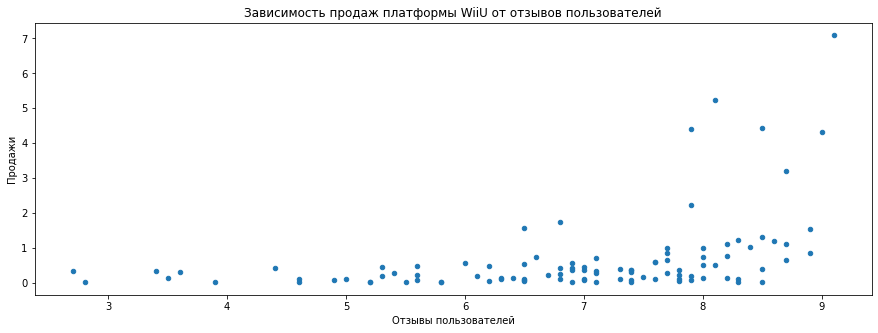

In [48]:
data.query('platform == "wiiu"').plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы пользователей',
    ylabel='Продажи',
    title='Зависимость продаж платформы WiiU от отзывов пользователей',
    figsize=(15, 5));

In [49]:
print('Коэффициент Пирсона равен',
data.query('platform == "wiiu"')['user_score'].corr(data.query('platform == "wiiu"')['total_sales']))

Коэффициент Пирсона равен 0.4002190202148617


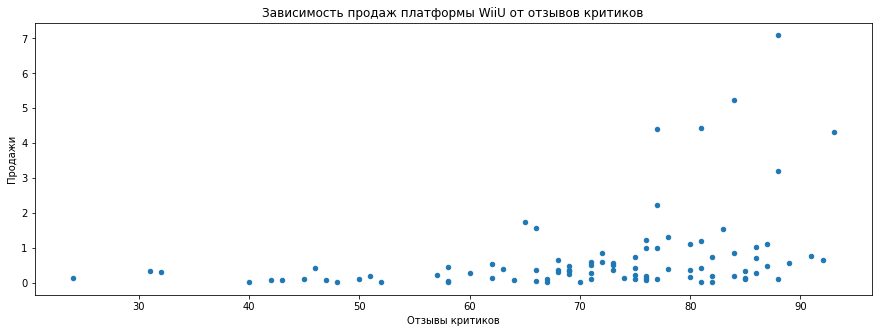

In [50]:
data.query('platform == "wiiu"').plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы критиков',
    ylabel='Продажи',
    title='Зависимость продаж платформы WiiU от отзывов критиков',
    figsize=(15, 5));

In [51]:
print('Коэффициент Пирсона равен',
data.query('platform == "wiiu"')['critic_score'].corr(data.query('platform == "wiiu"')['total_sales']))

Коэффициент Пирсона равен 0.34837976012017485


У платформы WiiU также слабая корреляция отзывов с продажами.

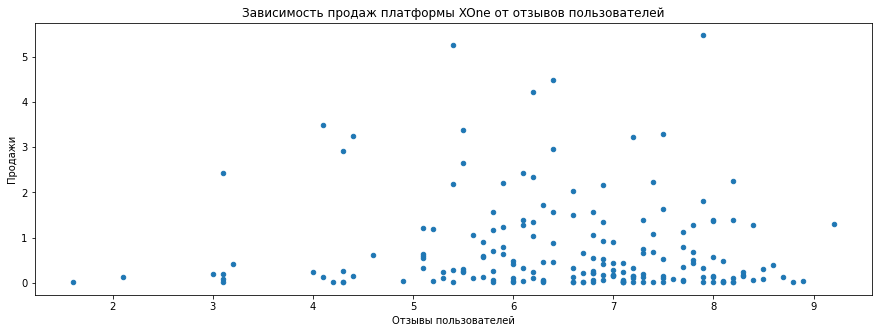

In [52]:
data.query('platform == "xone"').plot(
    x='user_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы пользователей',
    ylabel='Продажи',
    title='Зависимость продаж платформы XOne от отзывов пользователей',
    figsize=(15, 5));

In [53]:
print('Коэффициент Пирсона равен',
data.query('platform == "xone"')['user_score'].corr(data.query('platform == "xone"')['total_sales']))

Коэффициент Пирсона равен -0.06892505328279414


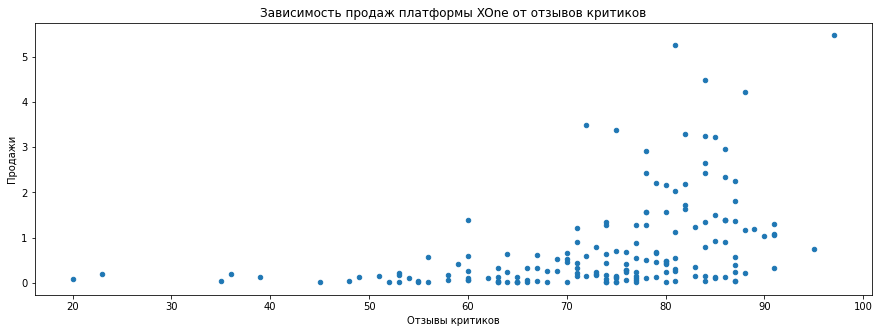

In [54]:
data.query('platform == "xone"').plot(
    x='critic_score', 
    y='total_sales', 
    kind='scatter', 
    xlabel='Отзывы критиков',
    ylabel='Продажи',
    title='Зависимость продаж платформы XOne от отзывов критиков',
    figsize=(15, 5));

In [55]:
print('Коэффициент Пирсона равен',
data.query('platform == "xone"')['critic_score'].corr(data.query('platform == "xone"')['total_sales']))

Коэффициент Пирсона равен 0.4169983280084017


Предыдущие выводы справедливы и для XOne: здесь, как и для других платформ, очень низкая корреляция между отзывами и количеством продаж.

### Посмотрим на общее распределение игр по жанрам.

In [56]:
genre_pivot_table = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_pivot_table

,total_sales
genre,
action,0.090
adventure,0.030
fighting,0.125
misc,0.090
platform,0.140
puzzle,0.045
racing,0.090
role-playing,0.110
shooter,0.515


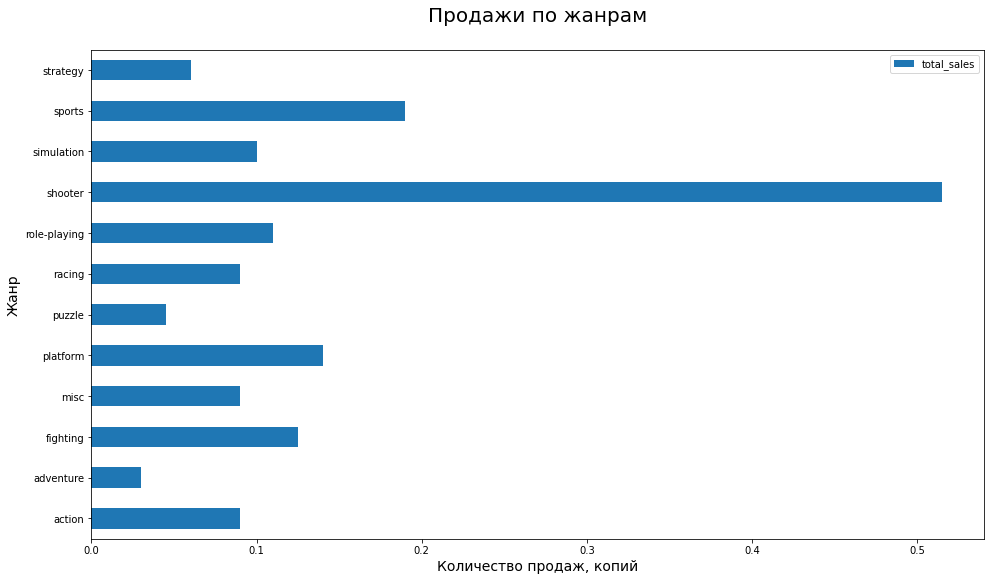

In [57]:
ax = genre_pivot_table.plot(kind='barh', figsize=(16, 9))
ax.set_ylabel('Жанр', fontsize=14)
ax.set_xlabel('Количество продаж, копий', fontsize=14)
ax.set_title('Продажи по жанрам'+ '\n', fontsize=20);

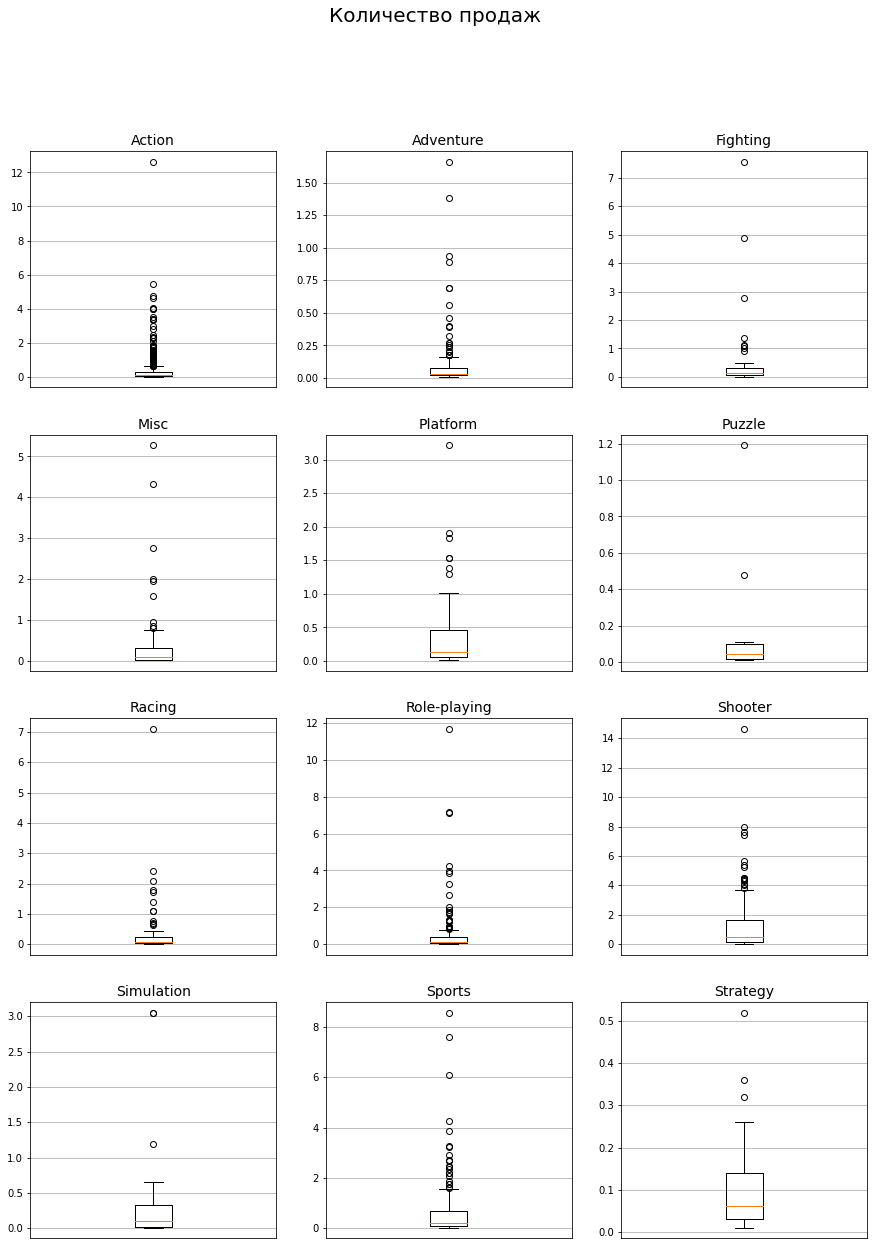

In [58]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs[0, 0].boxplot(actual_data.query('genre == "action"')['total_sales'])
axs[0, 1].boxplot(actual_data.query('genre == "adventure"')['total_sales'])
axs[0, 2].boxplot(actual_data.query('genre == "fighting"')['total_sales'])
axs[1, 0].boxplot(actual_data.query('genre == "misc"')['total_sales'])
axs[1, 1].boxplot(actual_data.query('genre == "platform"')['total_sales'])
axs[1, 2].boxplot(actual_data.query('genre == "puzzle"')['total_sales'])
axs[2, 0].boxplot(actual_data.query('genre == "racing"')['total_sales'])
axs[2, 1].boxplot(actual_data.query('genre == "role-playing"')['total_sales'])
axs[2, 2].boxplot(actual_data.query('genre == "shooter"')['total_sales'])
axs[3, 0].boxplot(actual_data.query('genre == "simulation"')['total_sales'])
axs[3, 1].boxplot(actual_data.query('genre == "sports"')['total_sales'])
axs[3, 2].boxplot(actual_data.query('genre == "strategy"')['total_sales'])

ax_labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
             'Racing', 'Role-playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

for i, ax in enumerate(axs.flat):
    ax.grid(visible=True)
    ax.set_title(ax_labels[i], fontsize=14)
    ax.axes.xaxis.set_visible(False)
fig.suptitle('Количество продаж', fontsize=20);

Посмотрим поближе на 75 квантиль и медиану

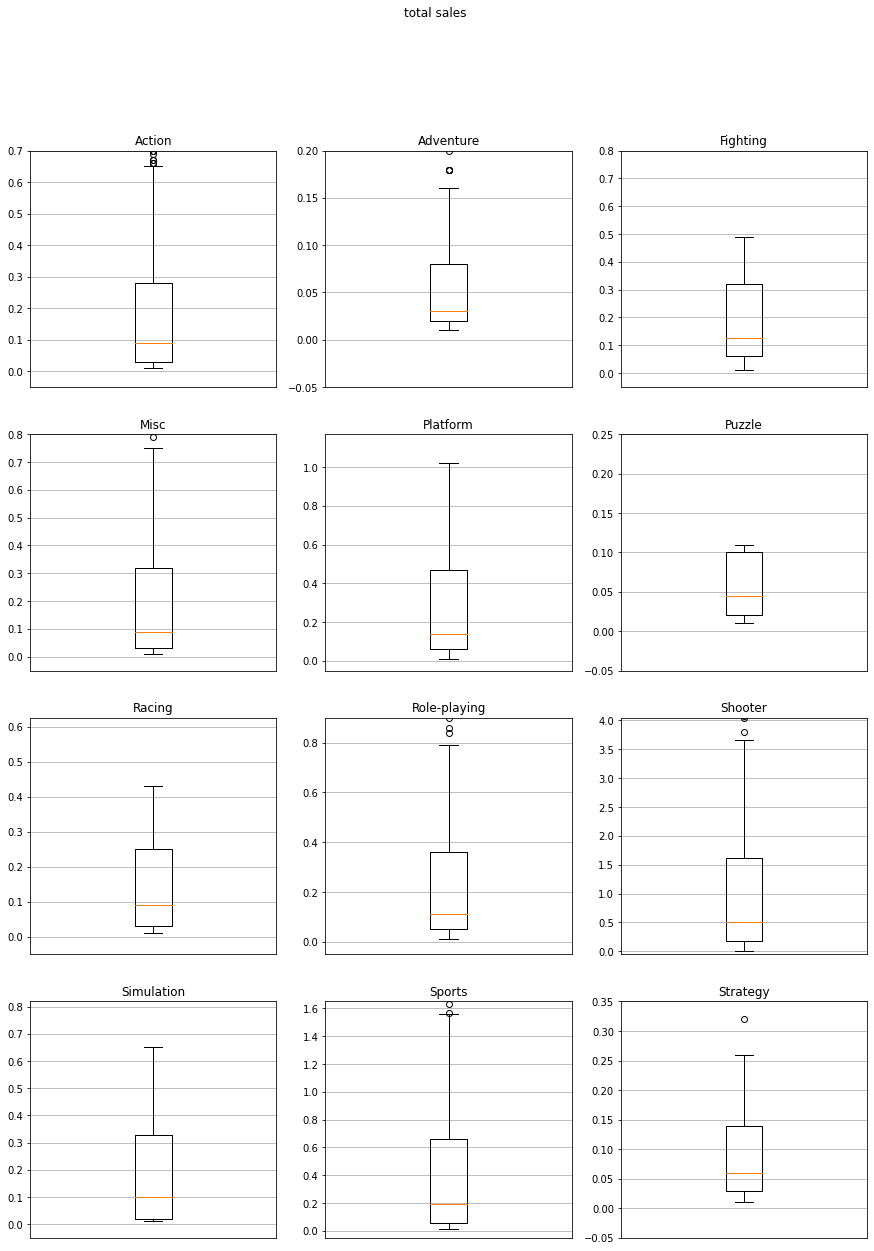

In [59]:
ax_labels = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
             'Racing', 'Role-playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
ax_genres = [x.lower() for x in ax_labels]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, ax in enumerate(axs.flat):
    genres_sales = actual_data.query('genre == @ax_genres[@i]')['total_sales']
    q75 = genres_sales.quantile(0.75) * 2.5
    ax.boxplot(genres_sales)
    ax.grid(visible=True)
    ax.set_title(ax_labels[i])
    ax.axes.xaxis.set_visible(False)
    ax.set_ybound(-0.05, q75)
fig.suptitle('total sales');

In [60]:
for genre in ['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
             'racing', 'role-playing', 'shooter', 'simulation', 'sports', 'strategy']:
    print(genre)
    display(actual_data.query('genre == @genre')['total_sales'].describe())

action


count    613.000000
mean       0.324894
std        0.801566
min        0.010000
25%        0.030000
50%        0.090000
75%        0.280000
max       12.620000
Name: total_sales, dtype: float64

adventure


count    181.000000
mean       0.096685
std        0.205015
min        0.010000
25%        0.020000
50%        0.030000
75%        0.080000
max        1.660000
Name: total_sales, dtype: float64

fighting


count    60.000000
mean      0.470333
std       1.188053
min       0.010000
25%       0.060000
50%       0.125000
75%       0.320000
max       7.550000
Name: total_sales, dtype: float64

misc


count    111.000000
mean       0.338108
std        0.742375
min        0.010000
25%        0.030000
50%        0.090000
75%        0.320000
max        5.270000
Name: total_sales, dtype: float64

platform


count    38.000000
mean      0.476053
std       0.722561
min       0.010000
25%       0.062500
50%       0.140000
75%       0.467500
max       3.210000
Name: total_sales, dtype: float64

puzzle


count    14.000000
mean      0.157857
std       0.320629
min       0.010000
25%       0.020000
50%       0.045000
75%       0.100000
max       1.190000
Name: total_sales, dtype: float64

racing


count    69.000000
mean      0.398841
std       0.963716
min       0.010000
25%       0.030000
50%       0.090000
75%       0.250000
max       7.090000
Name: total_sales, dtype: float64

role-playing


count    221.000000
mean       0.459005
std        1.177284
min        0.010000
25%        0.050000
50%        0.110000
75%        0.360000
max       11.680000
Name: total_sales, dtype: float64

shooter


count    128.000000
mean       1.335469
std        2.050567
min        0.010000
25%        0.172500
50%        0.515000
75%        1.617500
max       14.630000
Name: total_sales, dtype: float64

simulation


count    44.000000
mean      0.298409
std       0.646925
min       0.010000
25%       0.020000
50%       0.100000
75%       0.327500
max       3.050000
Name: total_sales, dtype: float64

sports


count    160.000000
mean       0.683687
std        1.242743
min        0.010000
25%        0.060000
50%        0.190000
75%        0.660000
max        8.580000
Name: total_sales, dtype: float64

strategy


count    37.000000
mean      0.107027
std       0.118412
min       0.010000
25%       0.030000
50%       0.060000
75%       0.140000
max       0.520000
Name: total_sales, dtype: float64

Медианное значение сильно выделяется у жанра shooter - 0,52 млн продаж. Дальше следует с большим отставанием жанр sports - 0.19 млн продаж.

Третий квартиль (75%) выше всего лежит у жанров shooter, sports и platform (1.62, 0.66, 0.47 млн продаж соответственно).

Наибольшее количество выбросов у жанра action, и одна игра, которая взлетела аж выше 12 млн продаж.

## Составим портрет пользователя каждого региона.

### Регион NA

In [61]:
top_5_platforms_na = actual_data.groupby(by='platform')['na_sales'] \
                        .sum().sort_values(ascending=False).head(5).index.to_list()
top_5_platforms_na

['ps4', 'xone', 'x360', '3ds', 'ps3']

In [62]:
na_platform_pivot_table = actual_data \
    .query('platform in @top_5_platforms_na') \
    .pivot_table(index='platform', values='na_sales', aggfunc='mean')
na_platform_pivot_table.style.format('{:,.2f}')

,na_sales
platform,
3ds,0.11
ps3,0.10
ps4,0.26
x360,0.25
xone,0.36


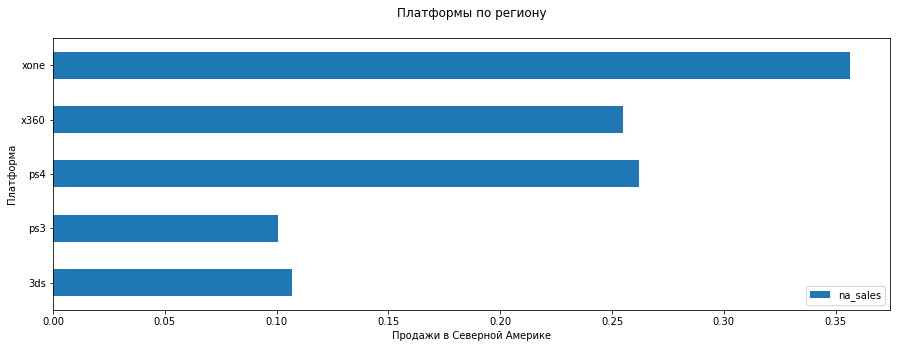

In [63]:
ax = na_platform_pivot_table.plot(kind='barh', figsize=(15, 5))
ax.set_xlabel('Продажи в Северной Америке')
ax.set_ylabel('Платформа')
ax.set_title('Платформы по региону'+ '\n');

Самую высокую долю продаж заниает платформа Х360 - 250 тысяч копий, самую низкую - платформа 3DS - 110 тысяч копий.

In [64]:
top_5_genres_na = actual_data.groupby(by='genre')['na_sales'] \
                        .sum().sort_values(ascending=False).head(5).index.to_list()
top_5_genres_na

['shooter', 'action', 'sports', 'role-playing', 'misc']

In [65]:
na_genre_pivot_table = actual_data \
    .query('genre in @top_5_genres_na') \
    .pivot_table(index='genre', values='na_sales', aggfunc='mean')
na_genre_pivot_table.style.format('{:,.2f}')

,na_sales
genre,
action,0.12
misc,0.14
role-playing,0.15
shooter,0.62
sports,0.29


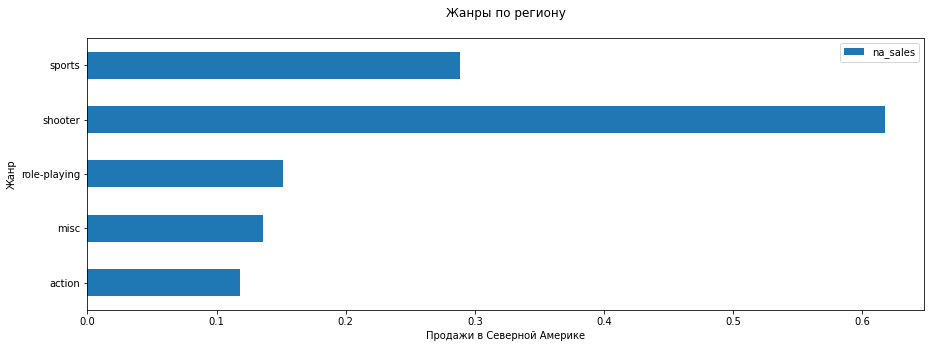

In [66]:
ax = na_genre_pivot_table.plot(kind='barh', figsize=(15, 5))
ax.set_xlabel('Продажи в Северной Америке')
ax.set_ylabel('Жанр')
ax.set_title('Жанры по региону'+ '\n');

Лучше всего в Северной Америке продаются шутеры, 620 тысяч копий, хуже всего - прочие жанры, 140 тысяч копий.

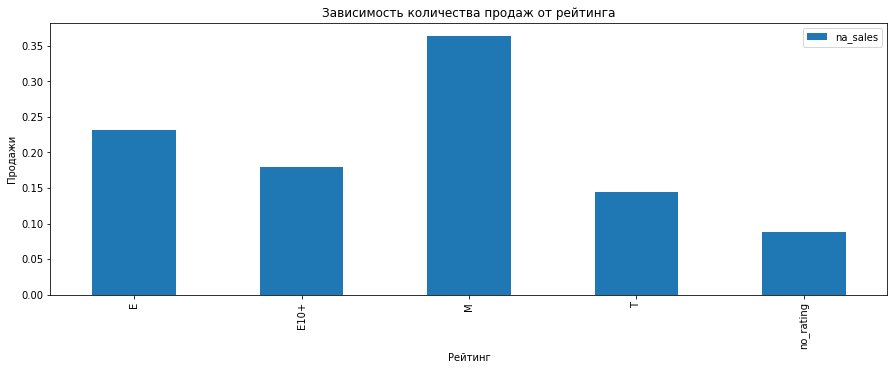

In [67]:
na_sales_by_esrb = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='mean') \
    .reset_index()
na_sales_by_esrb.plot(
    x='rating', 
    y='na_sales', 
    kind='bar', 
    xlabel='Рейтинг',
    ylabel='Продажи',
    title='Зависимость количества продаж от рейтинга',
    figsize=(15, 5));

Значительно выше остальных продажи игр с рейтингом M - cвыше 350 тыс копий, около 230 тысяч копий продано игр с рейтингом Е, для остальных рейтингов продажи не превышают 200 тысяч копий.

### Регион EU

In [68]:
top_5_platforms_eu = actual_data.groupby(by='platform')['eu_sales'] \
                        .sum().sort_values(ascending=False).head(5).index.to_list()
top_5_platforms_eu

['ps4', 'xone', 'ps3', 'pc', '3ds']

In [69]:
eu_platform_pivot_table = actual_data \
    .query('platform in @top_5_platforms_eu') \
    .pivot_table(index='platform', values='eu_sales', aggfunc='mean')
eu_platform_pivot_table.style.format('{:,.2f}')

,eu_sales
platform,
3ds,0.08
pc,0.12
ps3,0.12
ps4,0.35
xone,0.20


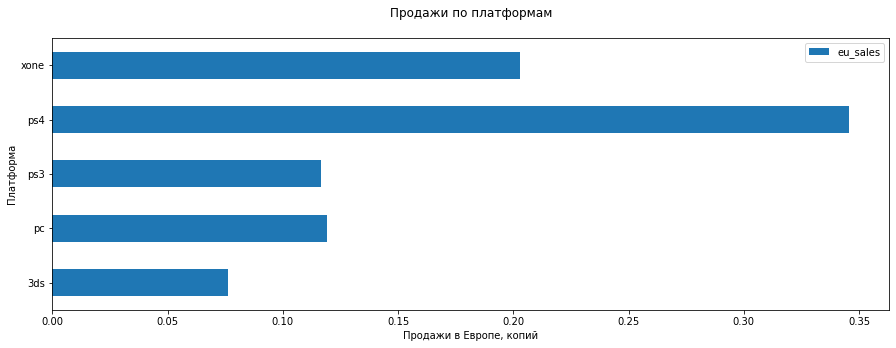

In [70]:
ax = eu_platform_pivot_table.plot(kind='barh', figsize=(15, 5))
ax.set_xlabel('Продажи в Европе, копий')
ax.set_ylabel('Платформа')
ax.set_title('Продажи по платформам'+ '\n');

Самая распространенная платформа в Европе - PS4: 350 тысяч копий, наименее распространеная - 3DS: 80 тысяч копий.

In [71]:
top_5_genres_eu = actual_data.groupby(by='genre')['eu_sales'] \
                        .sum().sort_values(ascending=False).head(5).index.to_list()
top_5_genres_eu

['action', 'shooter', 'sports', 'role-playing', 'racing']

In [72]:
eu_genre_pivot_table = actual_data \
    .query('genre in @top_5_genres_eu') \
    .pivot_table(index='genre', values='eu_sales', aggfunc='mean')
eu_genre_pivot_table.style.format('{:,.2f}')

,eu_sales
genre,
action,0.12
racing,0.20
role-playing,0.13
shooter,0.51
sports,0.29


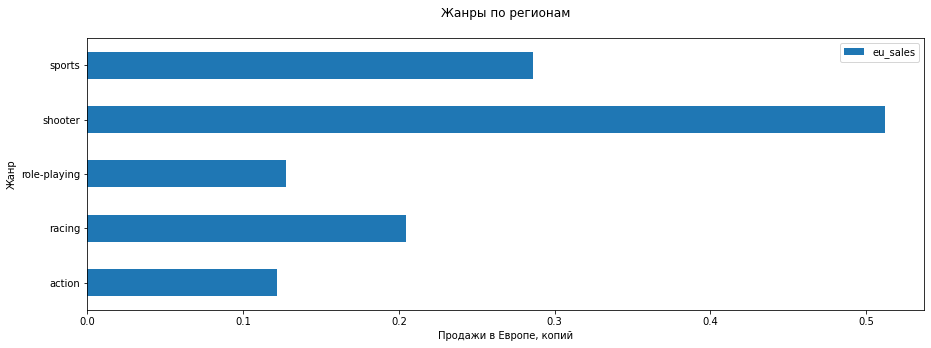

In [73]:
ax = eu_genre_pivot_table.plot(kind='barh', figsize=(15, 5))
ax.set_xlabel('Продажи в Европе, копий')
ax.set_ylabel('Жанр')
ax.set_title('Жанры по регионам'+ '\n');

Лучше всего в Европе продаются шутеры, 510 тысяч копий, хуже всего - экшн, 120 тысяч копий.

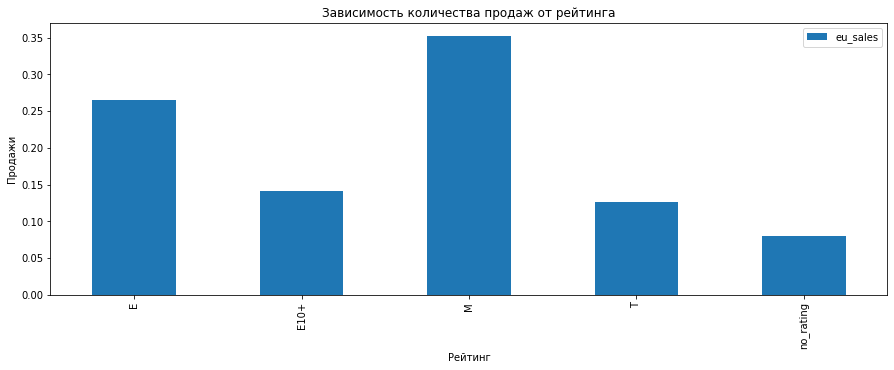

In [74]:
eu_sales_by_esrb = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='mean') \
    .reset_index()
eu_sales_by_esrb.plot(
    x='rating', 
    y='eu_sales', 
    kind='bar', 
    xlabel='Рейтинг',
    ylabel='Продажи',
    title='Зависимость количества продаж от рейтинга',
    figsize=(15, 5));

Значительно выше остальных продажи игр с рейтингом М - выше 350 тысяч копий, около 260 тысяч копий продано игр с рейтингом Е, для остальных рейтингов продажи не превышают 150 тысяч копий.

### Регион JP

In [75]:
top_5_platforms_jp = actual_data.groupby(by='platform')['jp_sales'] \
                        .sum().sort_values(ascending=False).head(5).index.to_list()
top_5_platforms_jp

['3ds', 'ps4', 'psv', 'ps3', 'wiiu']

In [76]:
jp_platform_pivot_table = actual_data \
    .query('platform in @top_5_platforms_jp') \
    .pivot_table(index='platform', values='jp_sales', aggfunc='mean')
jp_platform_pivot_table.style.format('{:,.2f}')

,jp_sales
platform,
3ds,0.21
ps3,0.05
ps4,0.04
psv,0.05
wiiu,0.10


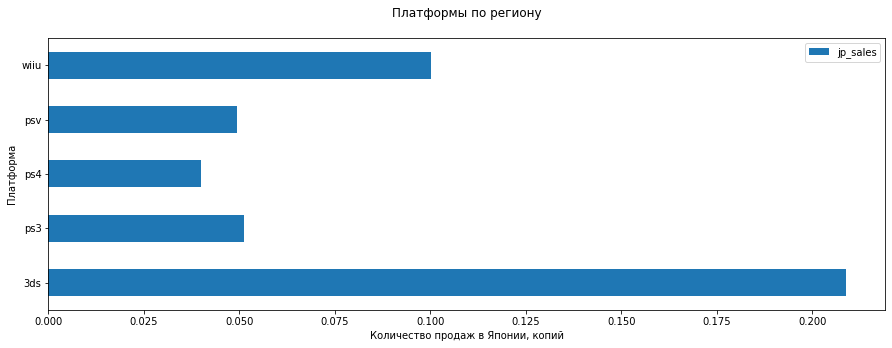

In [77]:
ax = jp_platform_pivot_table.plot(kind='barh', figsize=(15, 5))
ax.set_xlabel('Количество продаж в Японии, копий')
ax.set_ylabel('Платформа')
ax.set_title('Платформы по региону'+ '\n');

В Японии самая популярная платформа - 3DS (210 тысяч копий) а PS4 - наименее популярная (40 тысяч копий).

In [78]:
top_5_genres_jp = actual_data.groupby(by='genre')['jp_sales'] \
                        .sum().sort_values(ascending=False).head(5).index.to_list()
top_5_genres_jp

['role-playing', 'action', 'fighting', 'misc', 'shooter']

In [79]:
jp_genre_pivot_table = actual_data \
    .query('genre in @top_5_genres_jp') \
    .pivot_table(index='genre', values='jp_sales', aggfunc='mean')
jp_genre_pivot_table.style.format('{:,.2f}')

,jp_sales
genre,
action,0.05
fighting,0.11
misc,0.05
role-playing,0.14
shooter,0.04


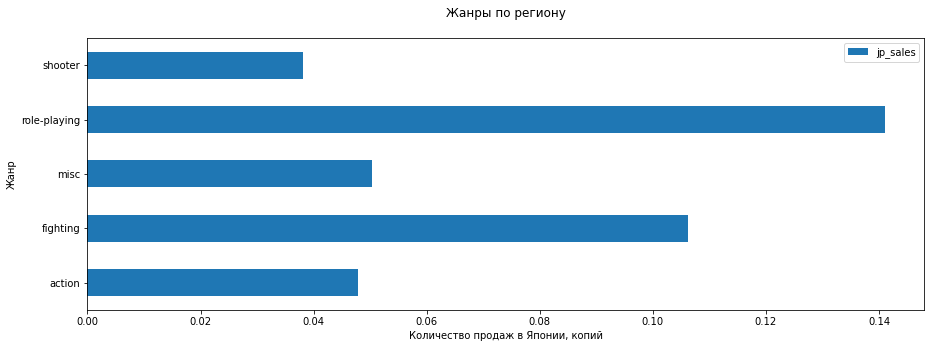

In [80]:
ax = jp_genre_pivot_table.plot(kind='barh', figsize=(15, 5))
ax.set_xlabel('Количество продаж в Японии, копий')
ax.set_ylabel('Жанр')
ax.set_title('Жанры по региону'+ '\n');

Самый популярный жанр в Японии - ролевая игра: 140 тысяч копий, а наименее популярная - шутер: 40 тысяч копий.

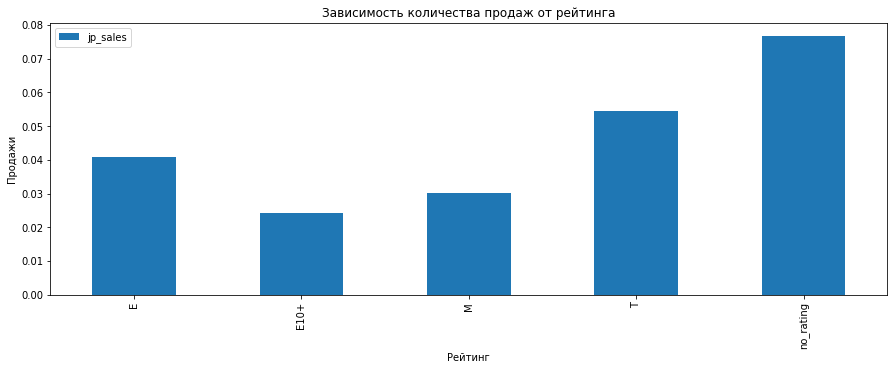

In [81]:
jp_sales_by_esrb = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='mean') \
    .reset_index()
jp_sales_by_esrb.plot(
    x='rating', 
    y='jp_sales', 
    kind='bar', 
    xlabel='Рейтинг',
    ylabel='Продажи',
    title='Зависимость количества продаж от рейтинга',
    figsize=(15, 5)
);

Японцы пользуются другой системой рейтингов, не ESRB, поэтому очень много игр без рейтинга - около 75 тыс копий. Лидируют игры с рейтингом Т - около 55 тыс копий. Для остальных рейтингов продажи составляют 40 тыс копий (Е) и менее.

### Распределение платформ по регионам.

In [82]:
top_platforms_na_data = actual_data.copy()
top_platforms_na_data['platform'] = top_platforms_na_data['platform'].apply(lambda x: x if x in top_5_platforms_na else 'other')

top_platforms_eu_data = actual_data.copy()
top_platforms_eu_data['platform'] = top_platforms_eu_data['platform'].apply(lambda x: x if x in top_5_platforms_eu else 'other')

top_platforms_jp_data = actual_data.copy()
top_platforms_jp_data['platform'] = top_platforms_jp_data['platform'].apply(lambda x: x if x in top_5_platforms_jp else 'other')

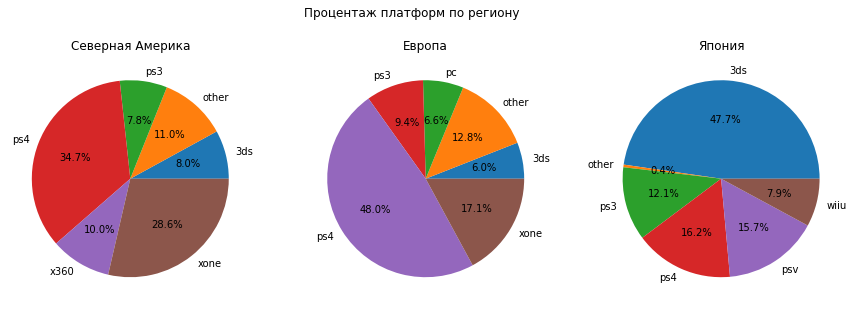

In [83]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
top_platforms_na_data.groupby(by='platform').sum().plot.pie(y='na_sales', ax=axs[0], autopct='%1.1f%%')
top_platforms_eu_data.groupby(by='platform').sum().plot.pie(y='eu_sales', ax=axs[1], autopct='%1.1f%%')
top_platforms_jp_data.groupby(by='platform').sum().plot.pie(y='jp_sales', ax=axs[2], autopct='%1.1f%%')

ax_labels = ['Северная Америка', 'Европа', 'Япония',]
for i, ax in enumerate(axs.flat):
    ax.set_title(ax_labels[i])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.legend().remove()
fig.suptitle('Процентаж платформ по региону');

В Северной Америке предпочитают играть на платформах PS4 (34.7%) и Xbox One(28.6%). В Европе - на PS4 (48%). В Японии на 3DS (47.7%).

### Распределение жанров по регионам.

In [84]:
top_genres_na_data = actual_data.copy()
top_genres_na_data['genre'] = top_genres_na_data['genre'].apply(lambda x: x if x in top_5_genres_na else 'other')

top_genres_eu_data = actual_data.copy()
top_genres_eu_data['genre'] = top_genres_eu_data['genre'].apply(lambda x: x if x in top_5_genres_eu else 'other')

top_genres_jp_data = actual_data.copy()
top_genres_jp_data['genre'] = top_genres_jp_data['genre'].apply(lambda x: x if x in top_5_genres_jp else 'other')

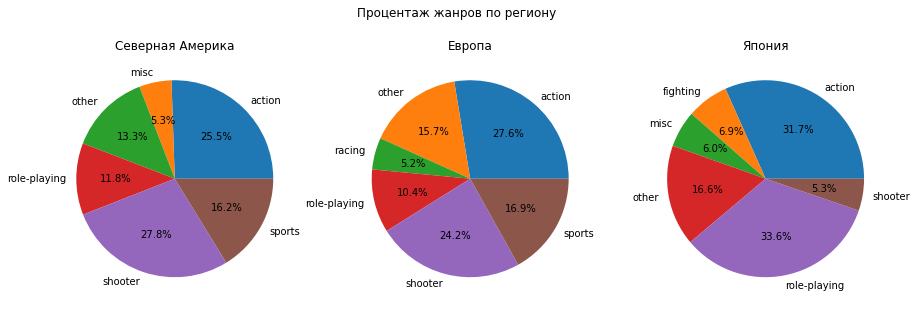

In [85]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
top_genres_na_data.groupby(by='genre').sum().plot.pie(y='na_sales', ax=axs[0], autopct='%1.1f%%')
top_genres_eu_data.groupby(by='genre').sum().plot.pie(y='eu_sales', ax=axs[1], autopct='%1.1f%%')
top_genres_jp_data.groupby(by='genre').sum().plot.pie(y='jp_sales', ax=axs[2], autopct='%1.1f%%')

ax_labels = ['Северная Америка', 'Европа', 'Япония',]
for i, ax in enumerate(axs.flat):
    ax.set_title(ax_labels[i])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.legend().remove()
fig.suptitle('Процентаж жанров по региону');

В Северной Америке играют в шутеры (27,8%) и экшн (25,5%). В Европе - в экшн (27,6%) и шутеры (24,2). В Японии - в ролевые игры (33,6%) и экшн (31,7%).

##  Проверим гипотезы

За нулевую гипотезу возьмем предположение о том, что средние двух генеральных совокупностей равны между собой. За альтернативную гипотезу возьмем утверждение, которое принимается верным, если отбрасывается нулевая гипотеза.

Уровнем статистической значимости выберем alpha = 0.05, как конвенциональное значение.

<b>Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [86]:
results = st.ttest_ind(
    actual_data.loc[(actual_data['platform'] == 'xone')&(actual_data['user_score'].notna())]['user_score'],
    actual_data.loc[(actual_data['platform'] == 'pc')&(actual_data['user_score'].notna())]['user_score'],
    equal_var=False
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


При верной гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, вероятность получить одинаковые значения средних для двух выборок равна 11,6%. Это выше порогового значения в 5%, поэтому нулевая гипотеза не может быть отвергнута.

<b>Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [87]:
results = st.ttest_ind(
    actual_data.loc[(actual_data['genre'] == 'action')&(actual_data['user_score'].notna())]['user_score'],
    actual_data.loc[(actual_data['genre'] == 'sports')&(actual_data['user_score'].notna())]['user_score'],
    equal_var=False
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


При верной гипотезе о том, что средние пользовательские рейтинги жанров action и sports равны, вероятность получить одинаковые значения средних для двух выборок значительно меньше порогового значения в 5%, поэтому нулевую гипотезу отвергаем.

## Общий вывод

На продажи игр влияет несколько факторов, такие как: платформа, с которой выпускается игра, жанр игры и регион.

В течение последних лет на пике продаж были разные платформы, среднее время пребывания на пике - 3-5 лет. На 2016 год на пике продаж была платформа PS4. Другие потенциально прибыльные платформы - это PS4, XOne и 3DS.

Лучше всего продаются игры жанра Shooter - 515 тысяч копий. Следом с большим отрывом идут жанры Sports, Platform и Fighting -  190 тысяч, 140 тысяч, 125 тысяч копий. соответственно. Самые слабые продажи у жанров Adventure, Puzzle и Strategy - 30 тысяч, 45 тысяч и 60 тысяч копий соответственно.

В разных регионах популярны разные платформы и жанры. В Северной Америке предпочитают играть на платформах PS4 (34.7%) и Xbox One (28.6%). В Европе - на PS4 (48%). В Японии - на 3DS (47.7%). В Северной Америке играют в шутеры (27,8%) и экшн (25,5%). В Европе - в экшн (27,6%) и шутеры (24,2). В Японии - в ролевые игры (33,6%) и экшн (31,7%).

Корреляция отзывов критиков или пользователей с продажами игр достаточно низка, нельзя сказать, что эти величины взаимосвязаны.

Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не получилось отвергнуть, значит можно сделать предположение, что на разных платформах пользователи оставляют играм одинаковые оценки.

А гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, мы отвергли, значит средние пользовательские рейтинги жанров Action и Sports действительно разные.